# **Creación de data tabular de la señales fisiológicas obtenidas en los laboratorios**

In [ ]:
#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

In [ ]:
#Seleccionamos estilo de ploteo
plt.style.use("ggplot")

# Definiendo las funciones que se usarán en el trabajo

In [ ]:
def convertirDF(d_sensor,ind):
  # Haciendo el dominoi del tiempo para cada array
  n = np.arange(0,d_sensor.shape[0])  # t = n*Ts,

  t = n*Ts

  #Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
  st_sensor = np.concatenate((t.reshape(-1,1),  d_sensor.reshape(-1,1)), axis=1)

  #Creamos el data frame con las varibles t y d_sensor1
  df = pd.DataFrame(st_sensor, columns=["t","d_sensor"+str(ind)])

  df = df.set_index("t")

  return df

In [ ]:
def crearDS(limite, df, ind,):
  a = int(df.index.max()/limite)+1
  b = int(df.shape[0]/a)
  

  d_obs = df[["d_sensor"+str(ind)]].values.reshape(a,b)

  return d_obs

In [ ]:
def rellenar(arr):
  # Crear un array de tamaño 50x1000 lleno de ceros
  new = np.zeros((50, 1000))

  # Copiar los valores del array original al nuevo array
  new[:arr.shape[0], :arr.shape[1]] = arr

  return new


## Lectura de los datos
Guardamos los valores de los sensores obtenidos en diferentes variables para su posterior ploteo, así como su conversión a un Dataset

In [ ]:
#Lectura de documento txt con tabulación (/t) como delimitador
array0 = np.genfromtxt("Basal.txt", delimiter="\t")
array1 = np.genfromtxt("Respiracion.txt", delimiter = "\t")
array2 = np.genfromtxt("post-Ejercicio.txt", delimiter = "\t")

print("array 1 = ",array0,"\n","array 2 = ",array1,"\n","array 3 = ",array2)

array 1 =  [[  0.   0.   0. ...   0. 488.  nan]
 [  1.   0.   0. ...   0. 484.  nan]
 [  2.   0.   0. ...   0. 483.  nan]
 ...
 [  9.   0.   0. ...   0. 505.  nan]
 [ 10.   0.   0. ...   0. 513.  nan]
 [ 11.   0.   0. ...   0. 518.  nan]] 
 array 2 =  [[  0.   0.   0. ...   0. 531.  nan]
 [  1.   0.   0. ...   0. 522.  nan]
 [  2.   0.   0. ...   0. 511.  nan]
 ...
 [ 11.   0.   0. ...   0. 472.  nan]
 [ 12.   0.   0. ...   0. 483.  nan]
 [ 13.   0.   0. ...   0. 500.  nan]] 
 array 3 =  [[  0.   0.   0. ...   0. 548.  nan]
 [  1.   0.   0. ...   0. 544.  nan]
 [  2.   0.   0. ...   0. 542.  nan]
 ...
 [  5.   0.   0. ...   0. 423.  nan]
 [  6.   0.   0. ...   0. 415.  nan]
 [  7.   0.   0. ...   0. 412.  nan]]


In [ ]:
#Nos quedamos con el dato del sensor
d_sensor0 = array0[:,-2]
d_sensor1 = array1[:,-2]
d_sensor2 = array2[:,-2]

print(d_sensor0, "\n", d_sensor1, "\n",d_sensor2)

[488. 484. 483. ... 505. 513. 518.] 
 [531. 522. 511. ... 472. 483. 500.] 
 [548. 544. 542. ... 423. 415. 412.]


## Graficación de los datos
Procedemos a graficar con todos los datos de los mismos, para verificar si hay algún *outliers* que impida crear un buen Dataset.

### Ploteo de las señal en estado Basal

Text(0, 0.5, 'mV')

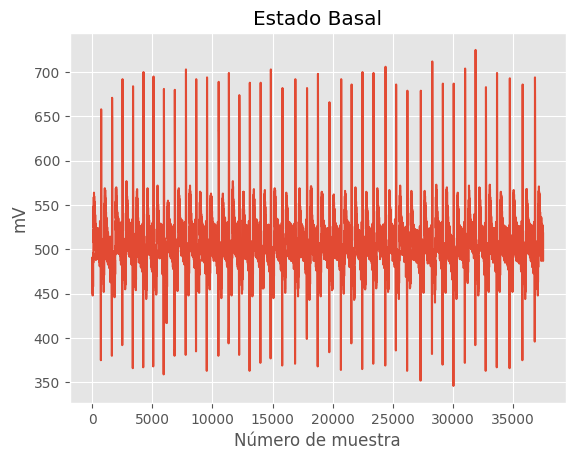

In [ ]:
plt.plot(d_sensor0)
plt.title("Estado Basal")
plt.xlabel('Número de muestra')
plt.ylabel('mV')
# plt.xlim(0,5000)

### Ploteo de la señal cuando se aguanta la respiración

Text(0, 0.5, 'mV')

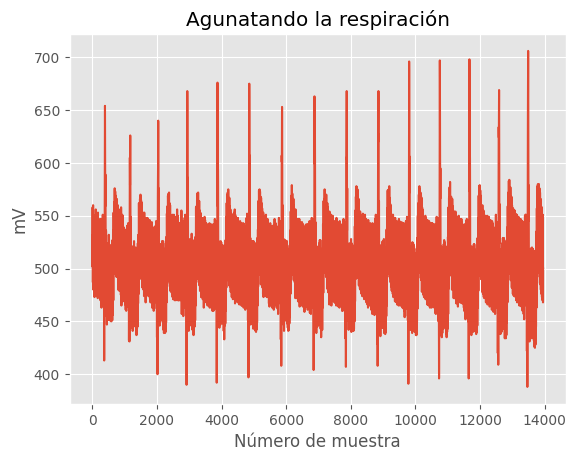

In [ ]:
plt.plot(d_sensor1)
plt.title("Aguantando la respiración")
plt.xlabel('Número de muestra')
plt.ylabel('mV')
# plt.xlim(0,5000)

### Ploteo de la señal post-Ejercicio

Text(0, 0.5, 'mV')

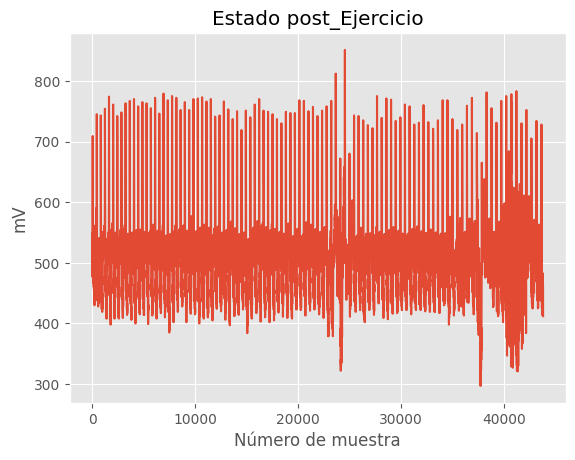

In [ ]:
plt.plot(d_sensor2)
plt.title("Estado post_Ejercicio")
plt.xlabel('Número de muestra')
plt.ylabel('mV')
# plt.xlim(0,5000)

Luego de observar las gráficas obtenidos luego de cada actividad realizada, se llaga a la conclusión
+ Para las dos primeras actividades (Estado basal y Aguantando respiración) aparentemente no es necesario realizar ningún tipo de corte de estas.
+ Mientras tanto, para la última actividad si se nota datos que no van acorde a los otros por tal motivo si es necesario eliminar cierta cantidad de datos.

Para saber exactamente en que segundo se bede hacer el corte, es necesario graficar la señal con el dominio del tiempo.

## Grafica con domnio en el tiempo
Para realizar esta gráfica es necesario especificar la Frecuencia de muestreo 

In [ ]:
Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición, es la misma para todas las actividades realizadas.
Ts=1/Fs

# Haciendo el dominoi del tiempo para cada array
n0 = np.arange(0,d_sensor0.shape[0])  # t = n*Ts,
n1 = np.arange(0,d_sensor1.shape[0]) 
n2 = np.arange(0,d_sensor2.shape[0]) 

t0 = n0*Ts
t1 = n1*Ts
t2 = n2*Ts

Text(0, 0.5, 'mV')

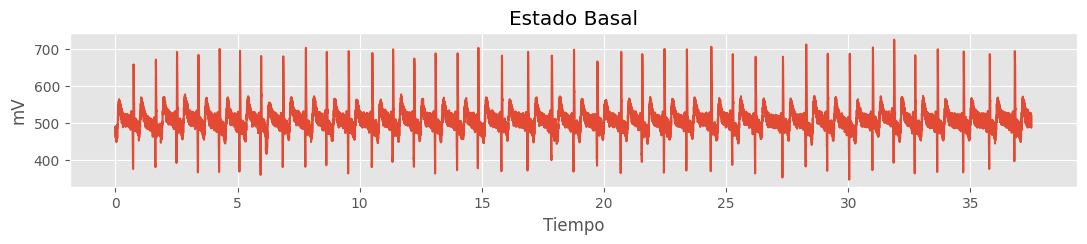

In [ ]:
#Ploteamos la señal en el tiempo
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t0, d_sensor0)
plt.title("Estado Basal")
plt.xlabel('Tiempo')
plt.ylabel('mV')

Text(0, 0.5, 'mV')

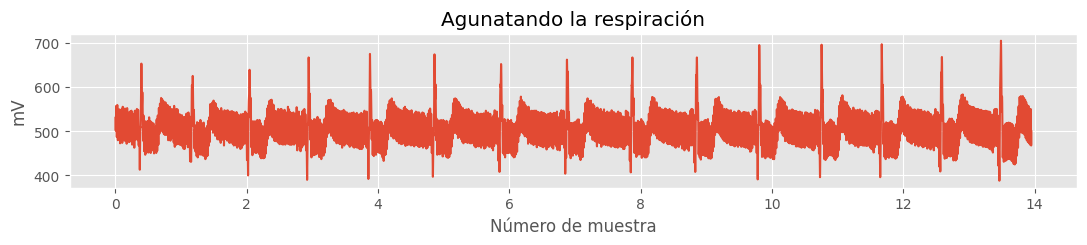

In [ ]:
#Ploteamos la señal en el tiempo
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t1, d_sensor1)
plt.title("Agunatando la respiración")
plt.xlabel('Número de muestra')
plt.ylabel('mV')

Text(0, 0.5, 'mV')

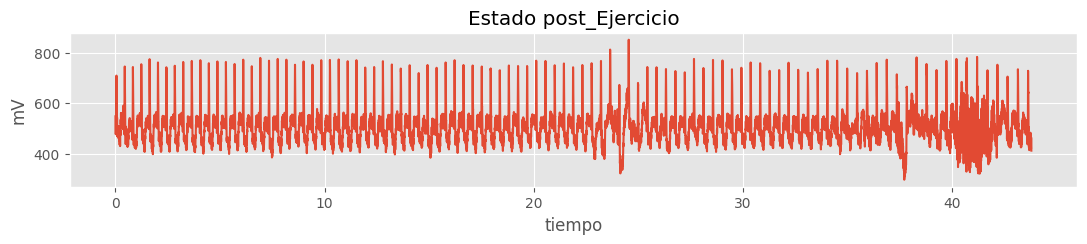

In [ ]:
#Ploteamos la señal en el tiempo
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t2, d_sensor2)
plt.title("Estado post_Ejercicio")
plt.xlabel('tiempo')
plt.ylabel('mV')

Luego de ver las gráficas, se nota lo siguiente.
+ En la primera actividad su duración era de 30 sefundos por tal motivo, si se debe eliminar datos, puesto que pueden generar errores, siendo este el caso, se tomarán del segundo 2 al 32 para evitar estos errores.
+ Para el segundo caso se tiene que su duración debió ser de 10 segundos, por tal motivo se tomará del segundo 1 al 11.
+ Para el tecer caso se nota que luego del segundo 22 aproximadaente la data presenta señales extrañas por tal motivo, se las eliminará, siendo así que el tiempo que se tomará en cuenta es de 2 a 22 segundos.

In [ ]:
# # Esto fue sacado de la gráfica
# d_sensor1 = d_sensor1[2000:32000]
# d_sensor2 = d_sensor2[1000:11000]
# d_sensor3 = d_sensor3[2000:22000]

#####################     NOTA  ################################
""" Estos se hace después de ver las gráficas del intervalo de un pico, puesto que si se mantenian estos valores
 Estos no se diferenciaban bien en el inicio"""
d_sensor0 = d_sensor0[2000:32000]
d_sensor1 = d_sensor1[1600:10600]
d_sensor2 = d_sensor2[2200:22200]


In [ ]:
print(d_sensor0.shape,"\n", d_sensor1.shape,"\n",d_sensor2.shape)

(30000,) 
 (9000,) 
 (20000,)


In [ ]:
df0 = convertirDF(d_sensor0,0)
df1 = convertirDF(d_sensor1,1)
df2 = convertirDF(d_sensor2,2)

Se imprimiran las primera 6 filas de los datasets creados

In [ ]:
df0.head(6)

,d_sensor0
t,
0.000,570.0
0.001,568.0
0.002,563.0
0.003,562.0
0.004,566.0
0.005,564.0


In [ ]:
df1.head(6)

,d_sensor1
t,
0.000,498.0
0.001,484.0
0.002,476.0
0.003,474.0
0.004,477.0
0.005,487.0


In [ ]:
df2.head(6)

,d_sensor2
t,
0.000,440.0
0.001,445.0
0.002,443.0
0.003,439.0
0.004,438.0
0.005,436.0


Procedemos a plotear el intervalo del tiempo donde se pueda notar una pico de la señal. Esto para las 3 bases de datos

(0.0, 0.4)

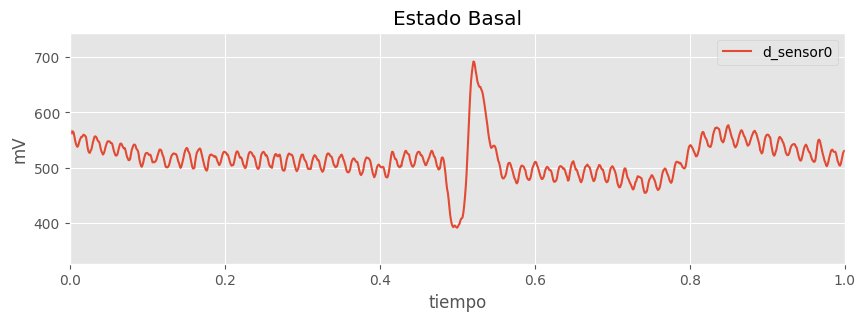

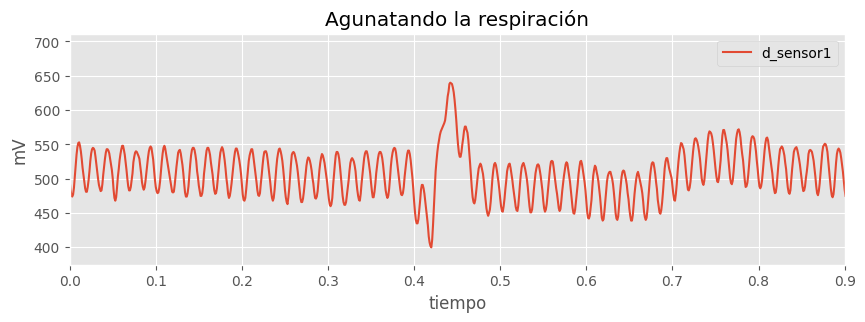

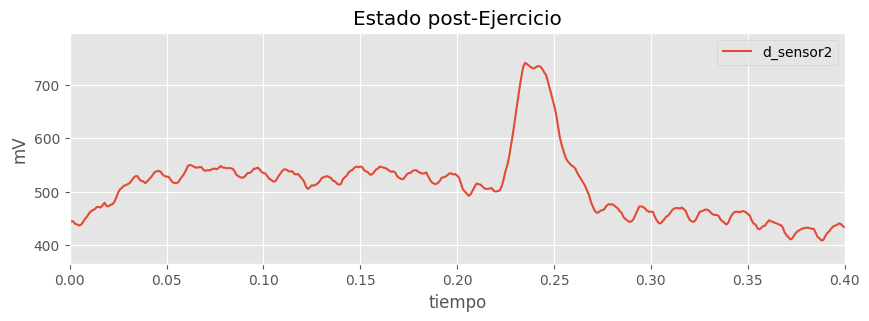

In [ ]:
#Ploteamos la señal

df0.plot(figsize=(10,3))
plt.title("Estado Basal")
plt.xlabel('tiempo')
plt.ylabel('mV')
plt.xlim(0,1)

df1.plot(figsize=(10,3))
plt.title("Agunatando la respiración")
plt.xlabel('tiempo')
plt.ylabel('mV')
plt.xlim(0,0.9)

df2.plot(figsize=(10,3))
plt.title("Estado post-Ejercicio")
plt.xlabel('tiempo')
plt.ylabel('mV')
plt.xlim(0,0.4)

Como estos valores permiten una buena visualización de los datos se procederá a crear los límites para ayudar a crear el dataset del ECG

In [ ]:
lim0 = 1
lim1 = 0.9
lim2 = 0.4

## Procediendo a colocar target a los datos
A coontinuación, se procederá a colocar target, para saber en que estado se sencuentra el particiapante acorde a su ECG. Se debe tener en cuenta el sigueinte criterio:

| Descripción | Categoria |
|----------|----------|
| Basal    | 0   |
| Respiracion   | 1   | 
| Post-Ejercicio    | 2   |

Por tal motivo se creará una función que realice lo anterior mencionado.

In [ ]:
Basal = crearDS(lim0, df0, 0)
Respiracion = crearDS(lim1, df1, 1)
PostEjercicio = crearDS(lim2, df2, 2)

Se imrpimirán los tam{os de estos datos

In [ ]:
print(Basal.shape, Respiracion.shape, PostEjercicio.shape)

(30, 1000) (10, 900) (50, 400)


Notamos que los taños más grandes son de 50x1000, por tal motivo, se procede a completar por ceros los valores faltantes

In [ ]:
# Rellenando los nuevos valores
N_basal = rellenar(Basal)
N_respiracion = rellenar(Respiracion)
N_postEjercicio = rellenar(PostEjercicio)

In [ ]:
print(N_basal.shape, N_respiracion.shape, N_postEjercicio.shape)

(50, 1000) (50, 1000) (50, 1000)


Procedemos a crear los target para los datos

In [ ]:
target_0 = np.repeat(0, N_basal.shape[0])
target_1 = np.repeat(1, N_basal.shape[0])     # Tienen las mismas dimensiones, por eso no se cambia la variable
target_2 = np.repeat(2, N_basal.shape[0])     # Tienen las mismas dimensiones, por eso no se cambia la variable

In [ ]:
data_B = np.concatenate((N_basal, N_respiracion, N_postEjercicio), axis=0)
target = np.concatenate((target_0, target_1, target_2))

In [ ]:
Dataset_ECG = {"base": data_B, "target": target}

In [ ]:
Dataset_ECG

{'base': array([[570., 568., 563., ..., 521., 527., 530.],
        [531., 531., 529., ..., 502., 506., 510.],
        [513., 514., 515., ..., 508., 517., 521.],
        ...,
        [692., 713., 732., ...,   0.,   0.,   0.],
        [533., 532., 531., ...,   0.,   0.,   0.],
        [540., 539., 537., ...,   0.,   0.,   0.]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])}

# Haciendo Machine Learning
Se hará el calsificador de árbolers de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from sklearn.metrics import classification_report

Defininedo variables

In [ ]:
X = Dataset_ECG["base"]
y = Dataset_ECG["target"]

Haciendo la participación para el entrenamiento y para el testeo, donde el 30% de los datos seran usados como testeo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

Haciendo el entrenamiento de los datos

In [ ]:
mdl = DecisionTreeClassifier()
mdl.fit(X_train, y_train)

DecisionTreeClassifier()

Haciendo la predicción del testo, para verificar el entrenamiento

In [ ]:
y_pred = mdl.predict(X_test)


Mostrando los valores que acertó la predicción y caules fallo

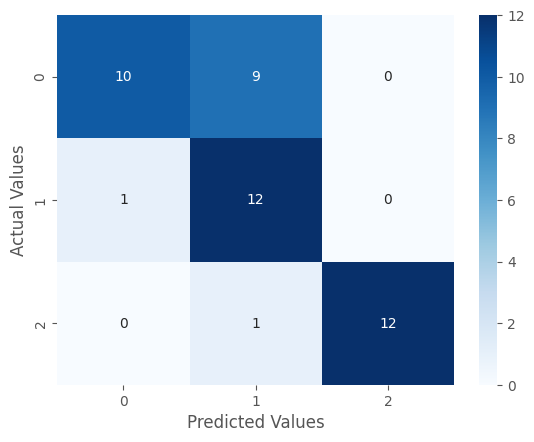

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure()
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Según la gráfica, la predicción tuvo los sigueintes erroes:
+ Para el reposo basal tuvo una mala predicción, la cual fue colocandolo como agunatando respiración.
+ Para la respiración, se tuvo 10 erroes, entre los caules, 9 fueron calsificados como reposo y un caso lo clasificó como post-Ejericio.
+ Mientras que, para el post-Ejercicio no tuvo ningún erro en la predicción.

A continuación se muestra su precisión.

Comprobando si hay overffiting.

In [ ]:
mdl.score(X_train,y_train)

0.8666666666666667

No presenta overfitting.

Viendo la precisión del entrenameinto.

In [ ]:
accuracy_score(y_test, y_pred)

0.7555555555555555

Este valor es producto, de que la señal no fue filtrada, y que los datos adquiridos, fueron completados con ceros para que los array tengan lammisma longitud.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.53      0.67        19
           1       0.55      0.92      0.69        13
           2       1.00      0.92      0.96        13

    accuracy                           0.76        45
   macro avg       0.82      0.79      0.77        45
weighted avg       0.83      0.76      0.76        45



Según los resultados se tuvo un accura